In [1]:
import pandas as pd

In [2]:
file_path = "./horse-colic.data"

char_count = 0

train_data =  []
single_data_entry = []
train_target = []

with open(file_path,'r') as f:
     for line in f:
       split_words = line.split()
       for word in split_words:
            single_data_entry.append(word)
#             if char_count==22:
#                 train_target.append(word)
#             else: 
#                 single_data_entry.append(word)
            if char_count==27:
                train_data.append(single_data_entry)
                single_data_entry = []
                char_count = -1
            char_count = char_count +1
df_cols = ['Surgery', 'Age','Hospital Number','Rectal Temp', 'Pulse','Respiratory Rate',
    'temperature of extremities','peripheral pulse','mucous membranes','capillary refill time','pain','peristalsis','abdominal distension',
    'nasogastric tube','nasogastric reflux','nasogastric reflux PH','rectal examination','abdomen','packed cell volume','total protein',
    'abdominocentesis appearance','abdomcentesis total protein','outcome','surgical lesion','site of lesion','type of lesion','subtype of lesion','cp_data'
    ] 
            
# Create the pandas DataFrame  
df = pd.DataFrame(train_data, columns = df_cols)  
  

## Exploration

In [3]:
# print the dataframe
print(df.head(3))

  Surgery Age Hospital Number Rectal Temp Pulse Respiratory Rate  \
0       2   1          530101       38.50    66               28   
1       1   1          534817        39.2    88               20   
2       2   1          530334       38.30    40               24   

  temperature of extremities peripheral pulse mucous membranes  \
0                          3                3                ?   
1                          ?                ?                4   
2                          1                1                3   

  capillary refill time  ... packed cell volume total protein  \
0                     2  ...              45.00          8.40   
1                     1  ...                 50            85   
2                     1  ...              33.00          6.70   

  abdominocentesis appearance abdomcentesis total protein outcome  \
0                           ?                           ?       2   
1                           2                           2      

In [4]:
#Checking the datatypes
df.dtypes

Surgery                        object
Age                            object
Hospital Number                object
Rectal Temp                    object
Pulse                          object
Respiratory Rate               object
temperature of extremities     object
peripheral pulse               object
mucous membranes               object
capillary refill time          object
pain                           object
peristalsis                    object
abdominal distension           object
nasogastric tube               object
nasogastric reflux             object
nasogastric reflux PH          object
rectal examination             object
abdomen                        object
packed cell volume             object
total protein                  object
abdominocentesis appearance    object
abdomcentesis total protein    object
outcome                        object
surgical lesion                object
site of lesion                 object
type of lesion                 object
subtype of l

In [8]:
#checking for null values
print(df.isna().sum())

Surgery                        0
Age                            0
Hospital Number                0
Rectal Temp                    0
Pulse                          0
Respiratory Rate               0
temperature of extremities     0
peripheral pulse               0
mucous membranes               0
capillary refill time          0
pain                           0
peristalsis                    0
abdominal distension           0
nasogastric tube               0
nasogastric reflux             0
nasogastric reflux PH          0
rectal examination             0
abdomen                        0
packed cell volume             0
total protein                  0
abdominocentesis appearance    0
abdomcentesis total protein    0
outcome                        0
surgical lesion                0
site of lesion                 0
type of lesion                 0
subtype of lesion              0
cp_data                        0
dtype: int64


### Measures of central tendency

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
sns.set("notebook")

In [9]:
print(df.describe(include='all'))

       Surgery  Age Hospital Number Rectal Temp Pulse Respiratory Rate  \
count      300  300             300         300   300              300   
unique       3    2             284          66    53               41   
top          1    1          528996           ?    48                ?   
freq       180  276               2          60    28               58   

       temperature of extremities peripheral pulse mucous membranes  \
count                         300              300              300   
unique                          5                5                7   
top                             3                1                1   
freq                          109              115               79   

       capillary refill time  ... packed cell volume total protein  \
count                    300  ...                300           300   
unique                     4  ...                 81            85   
top                        1  ...                  ?           

In [14]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=2)

from sklearn import preprocessing
#label encoding the dataframes
le = preprocessing.LabelEncoder()
for i in range(len(df_cols)):
    le.fit(df[df_cols[i]].astype(str))
    df[df_cols[i]] = le.transform(df[df_cols[i]].astype(str))
    
    
df_filled = imputer.fit_transform(df)

In [15]:
#Checking for skew and Kurtosis
stats.describe(df_filled)

DescribeResult(nobs=300, minmax=(array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]), array([  2.,   1., 283.,  65.,  52.,  40.,   4.,   4.,   6.,   3.,   5.,
         4.,   4.,   3.,   3.,  20.,   4.,   5.,  80.,  84.,   3.,  39.,
         3.,   1.,  60.,   5.,   2.,   1.])), mean=array([4.03333333e-01, 8.00000000e-02, 1.39010000e+02, 3.90200000e+01,
       3.02266667e+01, 1.88233333e+01, 1.84333333e+00, 1.70333333e+00,
       2.50333333e+00, 5.93333333e-01, 2.51000000e+00, 2.22333333e+00,
       1.77666667e+00, 1.53333333e+00, 1.43666667e+00, 1.81433333e+01,
       2.52000000e+00, 3.60000000e+00, 3.96133333e+01, 4.52700000e+01,
       2.11666667e+00, 3.08233333e+01, 5.60000000e-01, 3.63333333e-01,
       1.93100000e+01, 6.33333333e-02, 1.00000000e-02, 6.70000000e-01]), variance=array([2.48149387e-01, 7.38461538e-02, 6.66154171e+03, 3.08394247e+02,
       2.09874872e+02, 1.75871695e+02, 1.95865106e+00, 2.416711

In [18]:
#finding pearson correlation between parameters
df = pd.DataFrame(df_filled, columns = df_cols) 
pearson = df.corr(method='pearson')
pearson

,Surgery,Age,Hospital Number,Rectal Temp,Pulse,Respiratory Rate,temperature of extremities,peripheral pulse,mucous membranes,capillary refill time,...,packed cell volume,total protein,abdominocentesis appearance,abdomcentesis total protein,outcome,surgical lesion,site of lesion,type of lesion,subtype of lesion,cp_data
Surgery,1.000000,-0.090919,-0.002485,-0.029981,-0.025687,-0.125362,-0.148923,-0.190472,-0.170760,-0.097745,...,-0.065117,0.017162,0.083463,0.102240,-0.078480,0.585823,-0.265938,-0.098405,-0.010936,0.013257
Age,-0.090919,1.000000,-0.060051,0.118104,-0.189822,0.185831,0.050653,0.119703,0.098257,0.113795,...,-0.145527,-0.156107,-0.074938,0.001166,-0.007226,-0.043940,0.083604,0.012994,0.168010,-0.080482
Hospital Number,-0.002485,-0.060051,1.000000,-0.029868,-0.085214,-0.046931,0.011960,-0.068879,-0.027678,-0.116768,...,-0.185593,-0.080576,-0.011681,-0.241856,0.049503,0.126131,-0.136005,0.151861,0.103286,0.406118
Rectal Temp,-0.029981,0.118104,-0.029868,1.000000,0.032926,0.305684,0.125731,0.172709,0.156717,0.223015,...,0.154404,0.059384,0.089239,0.120996,0.044890,-0.097714,0.092496,-0.056294,0.008774,0.057005
Pulse,-0.025687,-0.189822,-0.085214,0.032926,1.000000,0.074402,0.007036,0.050962,0.088644,0.085200,...,-0.013070,0.021962,-0.008668,0.043201,0.035402,-0.098574,0.078467,-0.005234,-0.092540,-0.007137
Respiratory Rate,-0.125362,0.185831,-0.046931,0.305684,0.074402,1.000000,0.097433,0.107438,0.169767,0.162226,...,0.153013,0.113426,0.075465,0.047224,0.043304,-0.209780,0.217313,-0.071363,0.049939,0.100400
temperature of extremities,-0.148923,0.050653,0.011960,0.125731,0.007036,0.097433,1.000000,0.542728,0.502515,0.448692,...,0.206951,0.148925,0.170081,-0.096429,0.243373,-0.148432,0.082589,-0.036919,0.045783,0.073519
peripheral pulse,-0.190472,0.119703,-0.068879,0.172709,0.050962,0.107438,0.542728,1.000000,0.523592,0.467338,...,0.265830,0.158468,0.174114,-0.004720,0.226333,-0.177122,0.127802,0.111855,0.048225,0.098799
mucous membranes,-0.170760,0.098257,-0.027678,0.156717,0.088644,0.169767,0.502515,0.523592,1.000000,0.538680,...,0.410625,0.222921,0.069781,-0.102973,0.257831,-0.219019,0.028269,0.043170,0.079438,0.029585
capillary refill time,-0.097745,0.113795,-0.116768,0.223015,0.085200,0.162226,0.448692,0.467338,0.538680,1.000000,...,0.283762,0.181310,0.171427,0.041642,0.114560,-0.129500,0.073904,0.005643,0.115546,0.080495


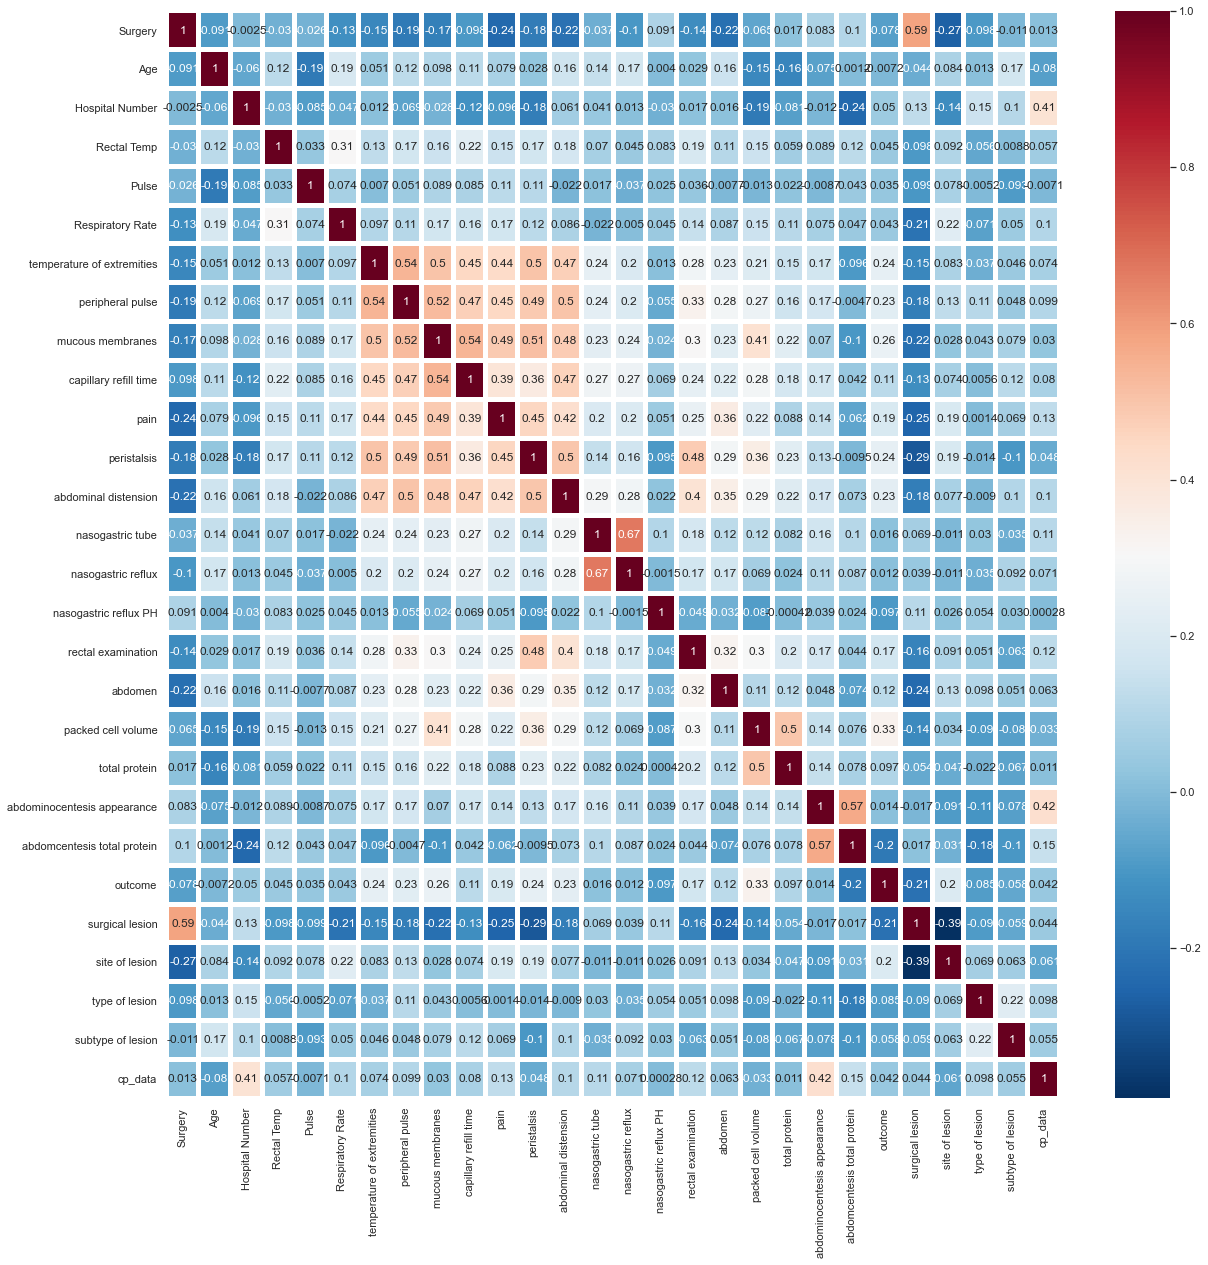

In [22]:
#Heatmap to visually display the correlation
fig, ax = plt.subplots(figsize=(20,20)) 
sns.heatmap(pearson,xticklabels=pearson.columns,yticklabels=pearson.columns,cmap='RdBu_r',annot=True,linewidth=4, ax=ax)